In [1]:
# To import all required modules to apply K-means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tricker
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import io
import pylab as pl
from google.colab import files
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##  Import dataset from File




In [2]:
f1 = files.upload()

Saving CC.csv to CC.csv


In [3]:
for fn in f1.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(f1[fn])))

df = pd.read_csv(io.StringIO(f1['CC.csv'].decode('utf-8')))

Uploaded file "CC.csv" with length 902879 bytes


In [4]:
# To show the first 5 rows in google play store dataset.
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# To show range of data, number of columns, type of features, and feature names  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## To Handle Null Values


In [6]:
# To Show number of null values in each column in google play store dataset 
dfnullValues = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
dfnullValues.columns = ['NO# of null values']
dfnullValues.index.name = 'Feature'
print(dfnullValues)

                                  NO# of null values
Feature                                             
MINIMUM_PAYMENTS                                 313
CREDIT_LIMIT                                       1
TENURE                                             0
PURCHASES_FREQUENCY                                0
BALANCE                                            0
BALANCE_FREQUENCY                                  0
PURCHASES                                          0
ONEOFF_PURCHASES                                   0
INSTALLMENTS_PURCHASES                             0
CASH_ADVANCE                                       0
ONEOFF_PURCHASES_FREQUENCY                         0
PRC_FULL_PAYMENT                                   0
PURCHASES_INSTALLMENTS_FREQUENCY                   0
CASH_ADVANCE_FREQUENCY                             0
CASH_ADVANCE_TRX                                   0
PURCHASES_TRX                                      0
PAYMENTS                                      

In [7]:
df.mean()

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

In [10]:
df=df.fillna(df.mean())

In [11]:
# To Show number of null values in each column in google play store dataset, to check the difference after we apply fillna() and dropna() functions on dataset

dfnullValues = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
dfnullValues.columns = ['NO# of null values']
dfnullValues.index.name = 'Feature'
print(dfnullValues)

                                  NO# of null values
Feature                                             
TENURE                                             0
PRC_FULL_PAYMENT                                   0
BALANCE                                            0
BALANCE_FREQUENCY                                  0
PURCHASES                                          0
ONEOFF_PURCHASES                                   0
INSTALLMENTS_PURCHASES                             0
CASH_ADVANCE                                       0
PURCHASES_FREQUENCY                                0
ONEOFF_PURCHASES_FREQUENCY                         0
PURCHASES_INSTALLMENTS_FREQUENCY                   0
CASH_ADVANCE_FREQUENCY                             0
CASH_ADVANCE_TRX                                   0
PURCHASES_TRX                                      0
CREDIT_LIMIT                                       0
PAYMENTS                                           0
MINIMUM_PAYMENTS                              

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## To create and train the Model

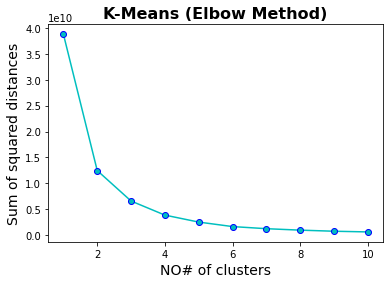

In [13]:
# To check which K is the best using the elbow method based on the result we will train our model using the best number of clusters we get

#To get the two features that we are going to use to categorize applications in google play store: 
df_X = df[['BALANCE' , 'TENURE']].iloc[: , :].values

# To Keep tracking of the line shape when we used elbow method

distortionsList = []

# To use different number of clusters when we train our model 
for i in range(1, 11):
    
    # To define a new model object we call it kmModel
    kmModel = KMeans(n_clusters=i, random_state=0)

    #To train the model using fet function using gPSDataset_X data set 
    kmModel.fit(df_X)

    # To assign the Sum of squared distances of samples to their closest cluster center in each iteration to the distortionsList.
    distortionsList.append(kmModel.inertia_)

# To visualize the result we get in Elbow method 
plt.title('K-Means (Elbow Method)', fontsize = 16, fontweight='bold')
plt.plot(range(1, 11), distortionsList, 'c', marker='o', markeredgecolor = 'b')
plt.xlabel('NO# of clusters', fontsize = 14)
plt.ylabel('Sum of squared distances', fontsize = 14)
plt.savefig('Elbow Method K-means.png', bbox_inches = 'tight')
plt.show()

## Result of Elbow Method:
As a result, we find out that K = 2 is the best number of clusters. We will train our model using 2 clusters to categorize application into 2 different groups.

In [14]:
# To define a new object of KMeans with 2 clusters
kmModel2 = KMeans(n_clusters=2,init='k-means++')

# To train our model using the new number of clusters which is 2
kmModel2.fit(df_X)

#To Evaluate our model we used predict() function the we show the silhouette score
y_predict_kmeans2 = kmModel2.predict(df_X)

from sklearn import metrics
kmModel2_score = metrics.silhouette_score(df_X, y_predict_kmeans2)
print('The silhouette score of our model is: ', kmModel2_score)

The silhouette score of our model is:  0.7403025787638986


## Clusters Visualization

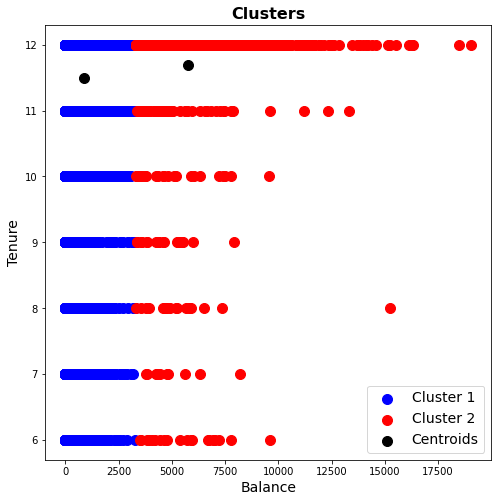

In [15]:

# To visualize our result we used scatter figure

plt.figure(figsize=(8,8))

plt.scatter(df_X[y_predict_kmeans2 == 0, 0], df_X[y_predict_kmeans2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(df_X[y_predict_kmeans2 == 1, 0], df_X[y_predict_kmeans2 == 1, 1], s = 100, c = 'red', label = 'Cluster 2')

#o show the centroid of each application group in the figure
plt.scatter(kmModel2.cluster_centers_[:, 0], kmModel2.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

# To create labels and title for our figure
plt.title('Clusters', fontsize = 16, fontweight='bold')
plt.xlabel('Balance', fontsize = 14)
plt.ylabel('Tenure', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('clusters.png', bbox_inches = 'tight')
plt.show()

In [16]:
df_scale = df.iloc[:,1:]

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df_scale)
df_scaler = scaler.transform(df_scale)
pca = PCA(2)
df_pca = pca.fit_transform(df_scaler)

In [19]:
df2 = pd.DataFrame(data=df_pca)
finaldf = pd.concat([df2,df[['BALANCE','TENURE']]],axis=1)
print(finaldf)

             0         1      BALANCE  TENURE
0    -1.682220 -1.076452    40.900749      12
1    -1.138293  2.506445  3202.467416      12
2     0.969685 -0.383528  2495.148862      12
3    -0.873627  0.043143  1666.670542      12
4    -1.599434 -0.688572   817.714335      12
...        ...       ...          ...     ...
8945 -0.359630 -2.016129    28.493517       6
8946 -0.564372 -1.639097    19.183215       6
8947 -0.926205 -1.810767    23.398673       6
8948 -2.336554 -0.657937    13.457564       6
8949 -0.556423 -0.400454   372.708075       6

[8950 rows x 4 columns]


In [20]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        8950 non-null   float64
 1   1        8950 non-null   float64
 2   BALANCE  8950 non-null   float64
 3   TENURE   8950 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 279.8 KB


In [18]:
finaldfnullValues = pd.DataFrame(finaldf.isnull().sum().sort_values(ascending=False))
finaldfnullValues.columns = ['NO# of null values']
finaldfnullValues.index.name = 'Feature'
print(finaldfnullValues)

         NO# of null values
Feature                    
TENURE                  297
BALANCE                 297
1                       297
0                       297


In [21]:
finaldf.mean()

0          4.070239e-16
1          5.105227e-16
BALANCE    1.564475e+03
TENURE     1.151732e+01
dtype: float64

In [22]:
finaldf = finaldf.fillna(finaldf.mean())

In [23]:
finaldfnullValues = pd.DataFrame(finaldf.isnull().sum().sort_values(ascending=False))
finaldfnullValues.columns = ['NO# of null values']
finaldfnullValues.index.name = 'Feature'
print(finaldfnullValues)

         NO# of null values
Feature                    
TENURE                    0
BALANCE                   0
1                         0
0                         0


In [24]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        8950 non-null   float64
 1   1        8950 non-null   float64
 2   BALANCE  8950 non-null   float64
 3   TENURE   8950 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 279.8 KB


In [25]:
kmModel2 = KMeans(n_clusters=2,init='k-means++')

# To train our model using the new number of clusters which is 2
kmModel2.fit(finaldf)

#To Evaluate our model we used predict() function the we show the silhouette score
y_predict_kmeans2 = kmModel2.predict(finaldf)

from sklearn import metrics
kmModel2_score = metrics.silhouette_score(finaldf, y_predict_kmeans2)
print('The silhouette score of our model is: ', kmModel2_score)

The silhouette score of our model is:  0.74029760805758


In [26]:
finaldf.head(5)

,0,1,BALANCE,TENURE
0,-1.682220,-1.076452,40.900749,12
1,-1.138293,2.506445,3202.467416,12
2,0.969685,-0.383528,2495.148862,12
3,-0.873627,0.043143,1666.670542,12
4,-1.599434,-0.688572,817.714335,12


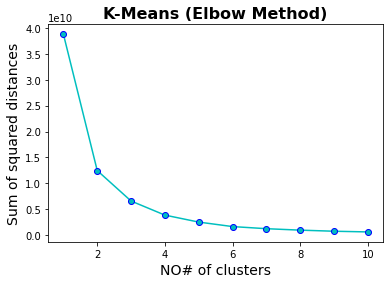

In [27]:
df_Xx = finaldf[['BALANCE' , 'TENURE']].iloc[: , :].values

# To Keep tracking of the line shape when we used elbow method

distortionsList = []

# To use different number of clusters when we train our model 
for i in range(1, 11):
    
    # To define a new model object we call it kmModel
    kmModel = KMeans(n_clusters=i, random_state=0)

    #To train the model using fet function using gPSDataset_X data set 
    kmModel.fit(df_Xx)

    # To assign the Sum of squared distances of samples to their closest cluster center in each iteration to the distortionsList.
    distortionsList.append(kmModel.inertia_)

# To visualize the result we get in Elbow method 
plt.title('K-Means (Elbow Method)', fontsize = 16, fontweight='bold')
plt.plot(range(1, 11), distortionsList, 'c', marker='o', markeredgecolor = 'b')
plt.xlabel('NO# of clusters', fontsize = 14)
plt.ylabel('Sum of squared distances', fontsize = 14)
plt.savefig('Elbow Method K-means2.png', bbox_inches = 'tight')
plt.show()

In [28]:
# To define a new object of KMeans with 2 clusters
kmModel2 = KMeans(n_clusters=2,init='k-means++')

# To train our model using the new number of clusters which is 2
kmModel2.fit(df_Xx)

#To Evaluate our model we used predict() function the we show the silhouette score
y_predict_kmeans2 = kmModel2.predict(df_Xx)

from sklearn import metrics
kmModel2_score = metrics.silhouette_score(df_Xx, y_predict_kmeans2)
print('The silhouette score of our model is: ', kmModel2_score)

The silhouette score of our model is:  0.7403025787638986


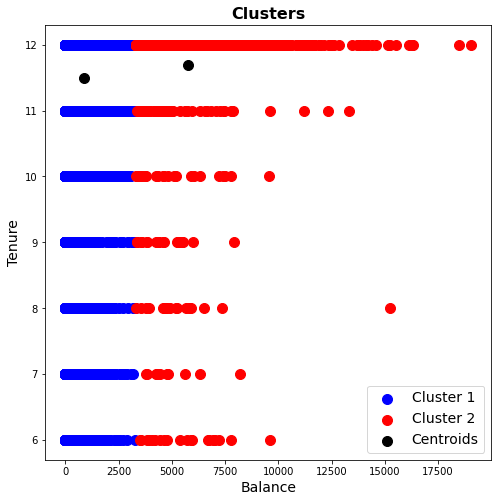

In [29]:
plt.figure(figsize=(8,8))

plt.scatter(df_Xx[y_predict_kmeans2 == 0, 0], df_Xx[y_predict_kmeans2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(df_Xx[y_predict_kmeans2 == 1, 0], df_Xx[y_predict_kmeans2 == 1, 1], s = 100, c = 'red', label = 'Cluster 2')

#o show the centroid of each application group in the figure
plt.scatter(kmModel2.cluster_centers_[:, 0], kmModel2.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

# To create labels and title for our figure
plt.title('Clusters', fontsize = 16, fontweight='bold')
plt.xlabel('Balance', fontsize = 14)
plt.ylabel('Tenure', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('clusters2.png', bbox_inches = 'tight')
plt.show()